In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
# Load dataset
df = pd.read_csv("../data/raw/diabetic_data.csv")
df.shape

(101766, 50)

### 1. Basic exploration

In [77]:
# Display the shape and first few rows of the dataset
print("Shape (rows, cols):", df.shape)
df.head()

Shape (rows, cols): (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [78]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [79]:
# Drop useless columns
# Drop IDs — not useful for modeling
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


Data types overview:
- The dataset has 101,766 observations and 50 columns
- 13 numeric columns
- 37 categorical columns

### 2. Handle Missing Values

In [81]:
# Replace '?' with np.nan for consistent missing value handling
df.replace('?', np.nan, inplace=True)

# Check missing values (now all as NaN)
missing_nan = df.isna().sum()
missing_summary = pd.DataFrame({
    "NaN_missing": missing_nan,
    "Percent_missing": (missing_nan / len(df)) * 100
}).sort_values("Percent_missing", ascending=False)

missing_summary.head(15)

,NaN_missing,Percent_missing
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636
tolbutamide,0,0.000000


In [82]:
unique_counts = pd.DataFrame({
    "column": df.columns,
    "unique_values": [df[col].nunique() for col in df.columns]
}).sort_values(by="unique_values", ascending=False)

print(unique_counts)

                      column  unique_values
18                    diag_3            789
17                    diag_2            748
16                    diag_1            716
10        num_lab_procedures            118
12           num_medications             75
9          medical_specialty             72
13         number_outpatient             39
14          number_emergency             33
5   discharge_disposition_id             26
15          number_inpatient             21
6        admission_source_id             17
8                 payer_code             17
19          number_diagnoses             16
7           time_in_hospital             14
2                        age             10
3                     weight              9
4          admission_type_id              8
11            num_procedures              7
0                       race              5
28                 glipizide              4
40       glyburide-metformin              4
39                   insulin    

In [83]:
for col in df.columns:
    print("\n", col)
    print(df[col].value_counts(normalize=True).head())


 race
race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: proportion, dtype: float64

 gender
gender
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: proportion, dtype: float64

 age
age
[70-80)    0.256156
[60-70)    0.220928
[50-60)    0.169565
[80-90)    0.168986
[40-50)    0.095169
Name: proportion, dtype: float64

 weight
weight
[75-100)     0.417892
[50-75)      0.280576
[100-125)    0.195496
[125-150)    0.045355
[25-50)      0.030341
Name: proportion, dtype: float64

 admission_type_id
admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
Name: proportion, dtype: float64

 discharge_disposition_id
discharge_disposition_id
1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
Name: proportion, dtype: float64

 admission_source_id
admission_source_id
7     0.564963
1     0.290519
17    0

### 3. Drop or Handle Irrelevant Columns

In [84]:
# Drop high-missingness columns
df.drop(columns=['weight',"max_glu_serum", "A1Cresult", "medical_specialty", 'payer_code', ], inplace=True)


In [ ]:
# Diagnosis columns contain high-cardinality categorical values (ICD codes). 
# Including all three diagnosis columns would significantly increase dimensionality 
# after encoding and introduce sparsity, which can negatively affect model generalization.
df.drop(columns=["diag_2", "diag_3"],inplace=True)

In [86]:
# Several medication features exhibited extremely low variance, with more than 99% of observations belonging to a 
# single category. Such features provide minimal predictive information and may 
# introduce noise; therefore, they were removed as part of feature selection.
# list of columns to drop (very low variance / useless)
cols_to_drop = [
    "examide",
    "citoglipton",
    "acetohexamide",
    "tolbutamide",
    "troglitazone",
    "tolazamide",
    "miglitol",
    "metformin-pioglitazone",
    "metformin-rosiglitazone",
    "glimepiride-pioglitazone",
    "glipizide-metformin",
    "glyburide-metformin",
    "acarbose",
    "chlorpropamide"
]

# drop them
df = df.drop(columns=cols_to_drop)

# check result
print("New shape:", df.shape)
print("Remaining columns:", df.columns)

New shape: (101766, 27)
Remaining columns: Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


### 4. Handle Duplicates & Repeated Patients

In [87]:
df.duplicated().sum()


1

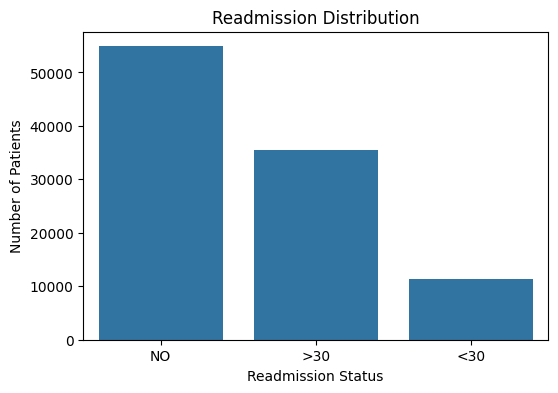

In [88]:
# Visualize the distribution of the target variable (readmitted)
plt.figure(figsize=(6,4))
sns.countplot(x="readmitted", data=df)
plt.title("Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")
plt.show()

Most patients were not readmitted; fewer were readmitted within 30 days (<30)

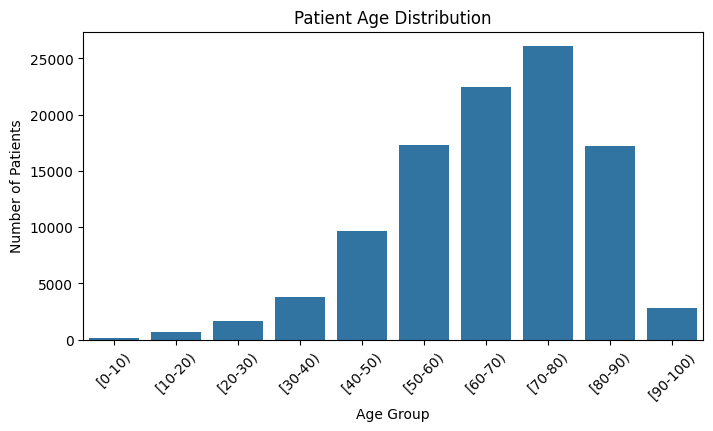

In [89]:
# Visualize patient age distribution
plt.figure(figsize=(8,4))
sns.countplot(x="age", data=df, order=sorted(df["age"].unique()))
plt.title("Patient Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

Most patients are older adults, especially between 60–80 years

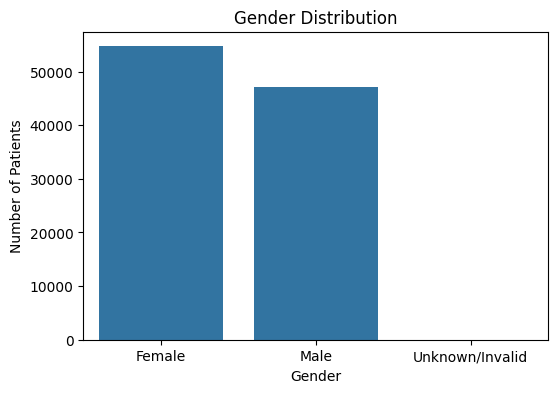

In [90]:
# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.show()

Dataset has slightly more female than male patients

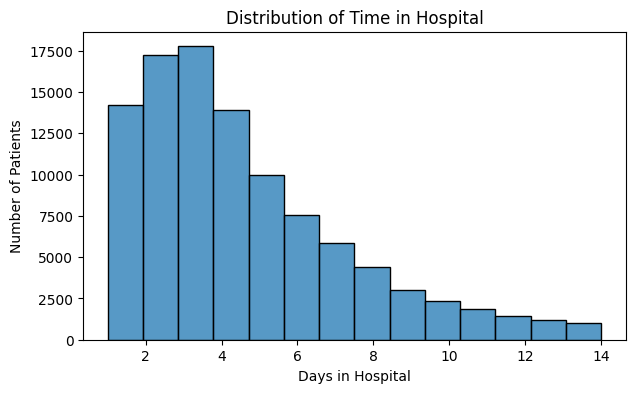

In [91]:
# Visualize the distribution of length of hospital stay
plt.figure(figsize=(7,4))
sns.histplot(df["time_in_hospital"], bins=14)
plt.title("Distribution of Time in Hospital")
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")
plt.show()

Most patients stay between 2–5 days; long hospital stays are less common

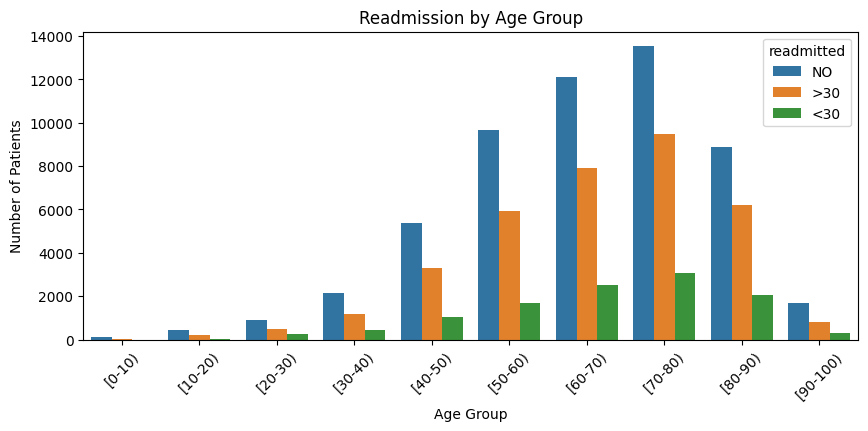

In [92]:
# Visualize readmission by age group
plt.figure(figsize=(10,4))
sns.countplot(x="age", hue="readmitted", data=df, order=sorted(df["age"].unique()))
plt.title("Readmission by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

Readmissions are more frequent among older patients, especially age 60–80

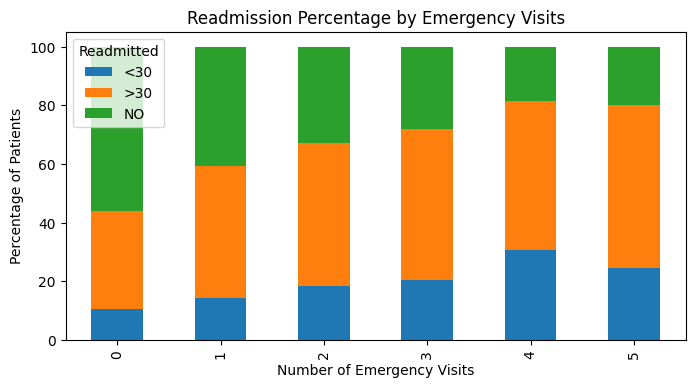

In [93]:
# Visualize readmission rate by number of emergency visits (percentage)
subset = df[df["number_emergency"] <= 5]
# Create percentage table
percentage_table = pd.crosstab(subset["number_emergency"], subset["readmitted"], normalize="index") * 100
# Plot
percentage_table.plot(kind="bar", stacked=True, figsize=(8,4))
plt.title("Readmission Percentage by Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Percentage of Patients")
plt.legend(title="Readmitted")
plt.show()

Patients with more emergency visits tend to have higher readmission rates

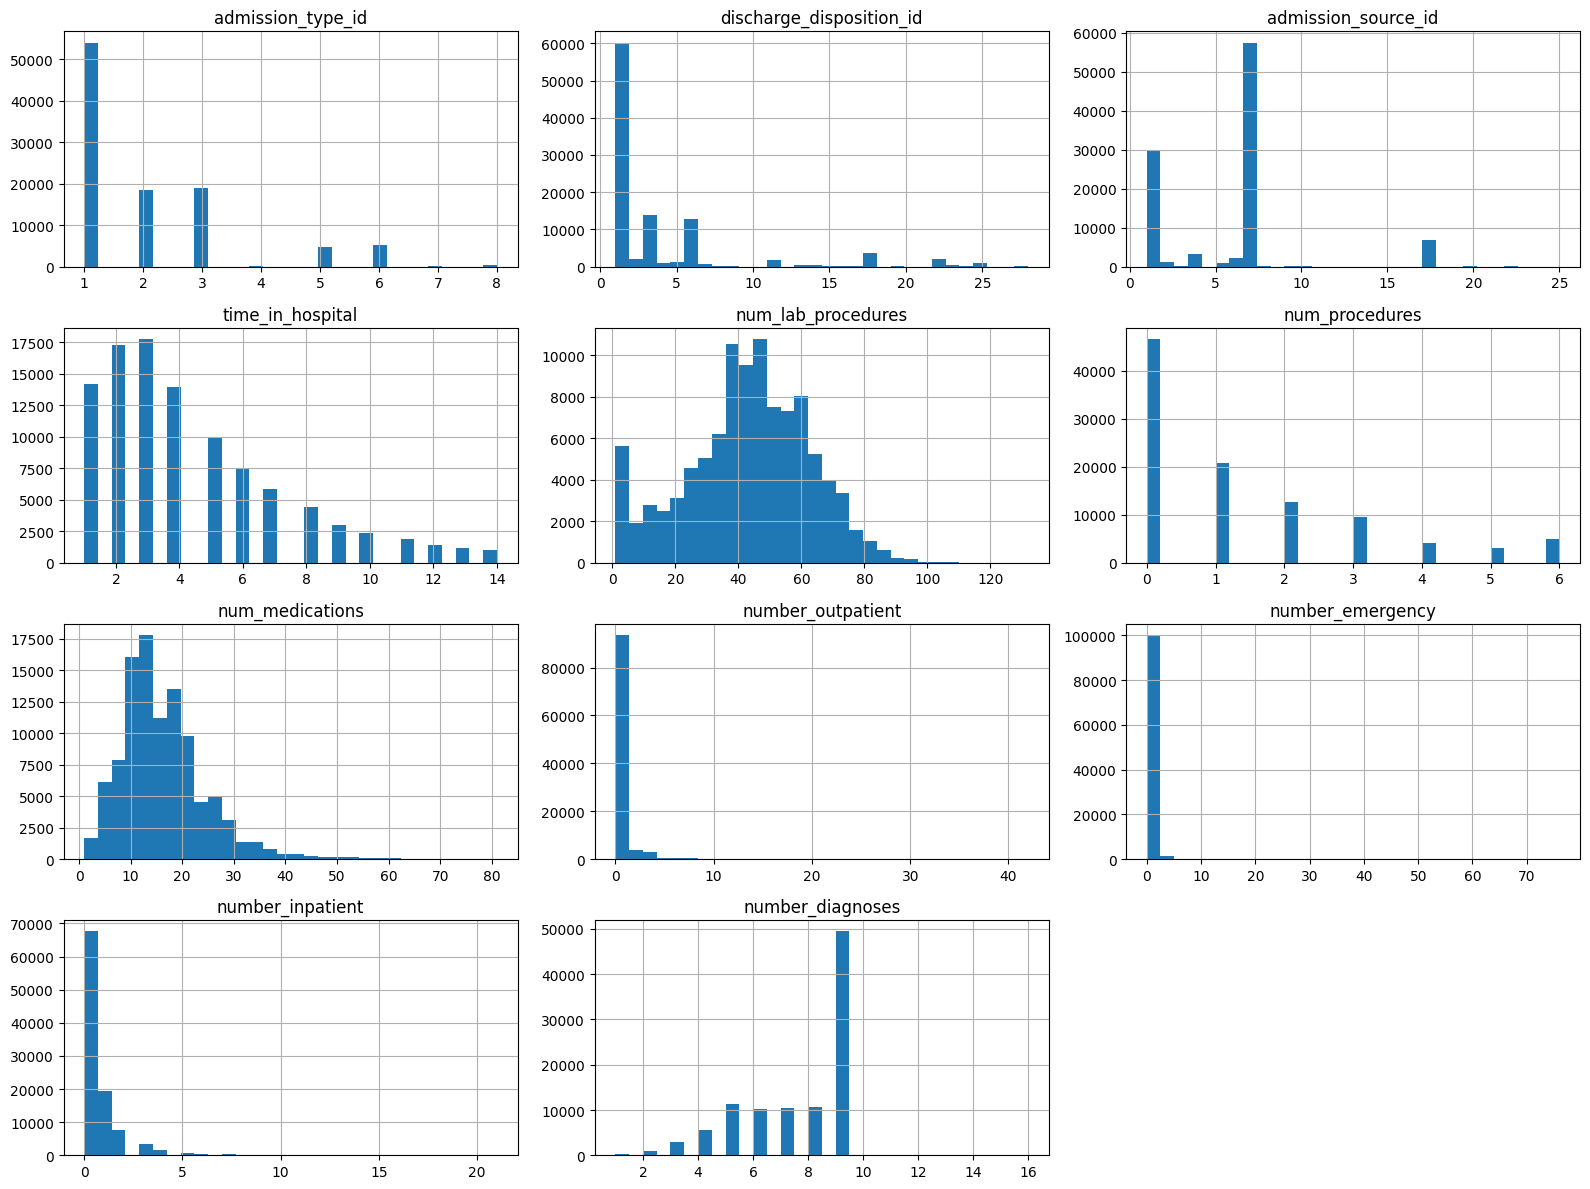

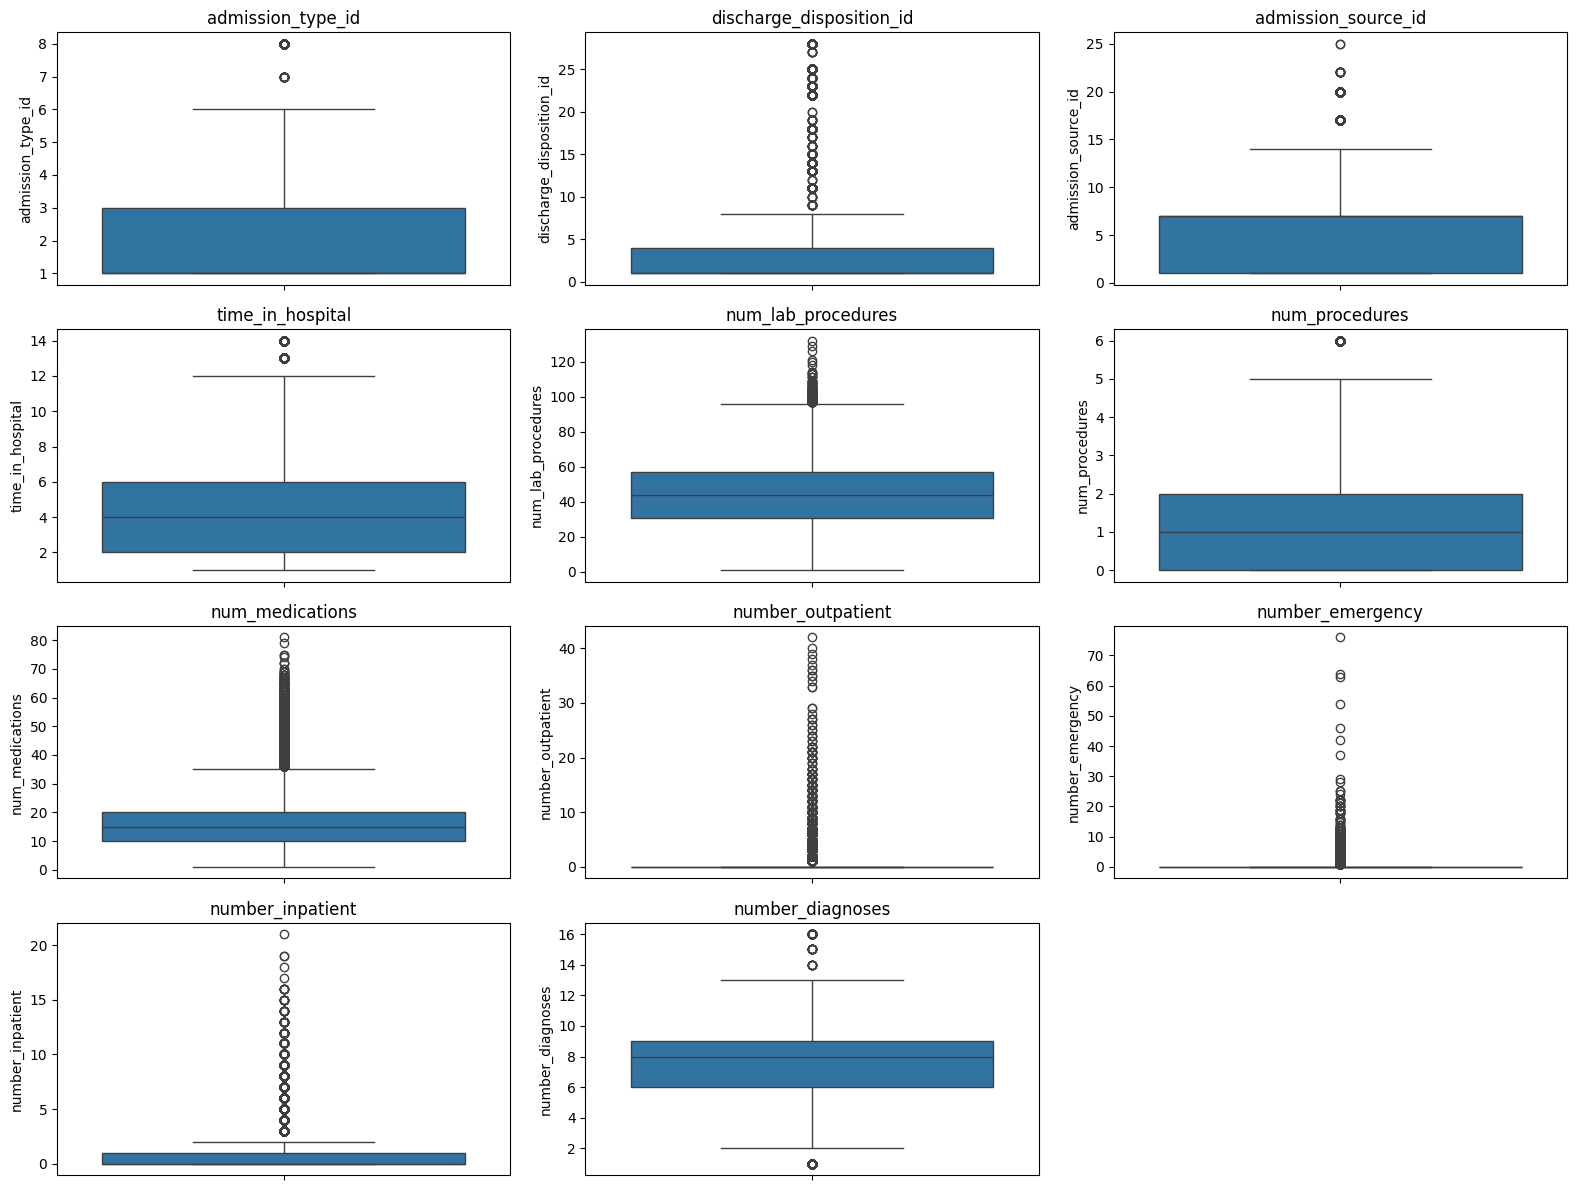

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


In [96]:
# Histograms for all numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols].hist(bins=30, figsize=(16, 12), layout=(len(numeric_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()

# Boxplots for all numeric columns to check for outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary statistics for numeric columns
df[numeric_cols].describe().T

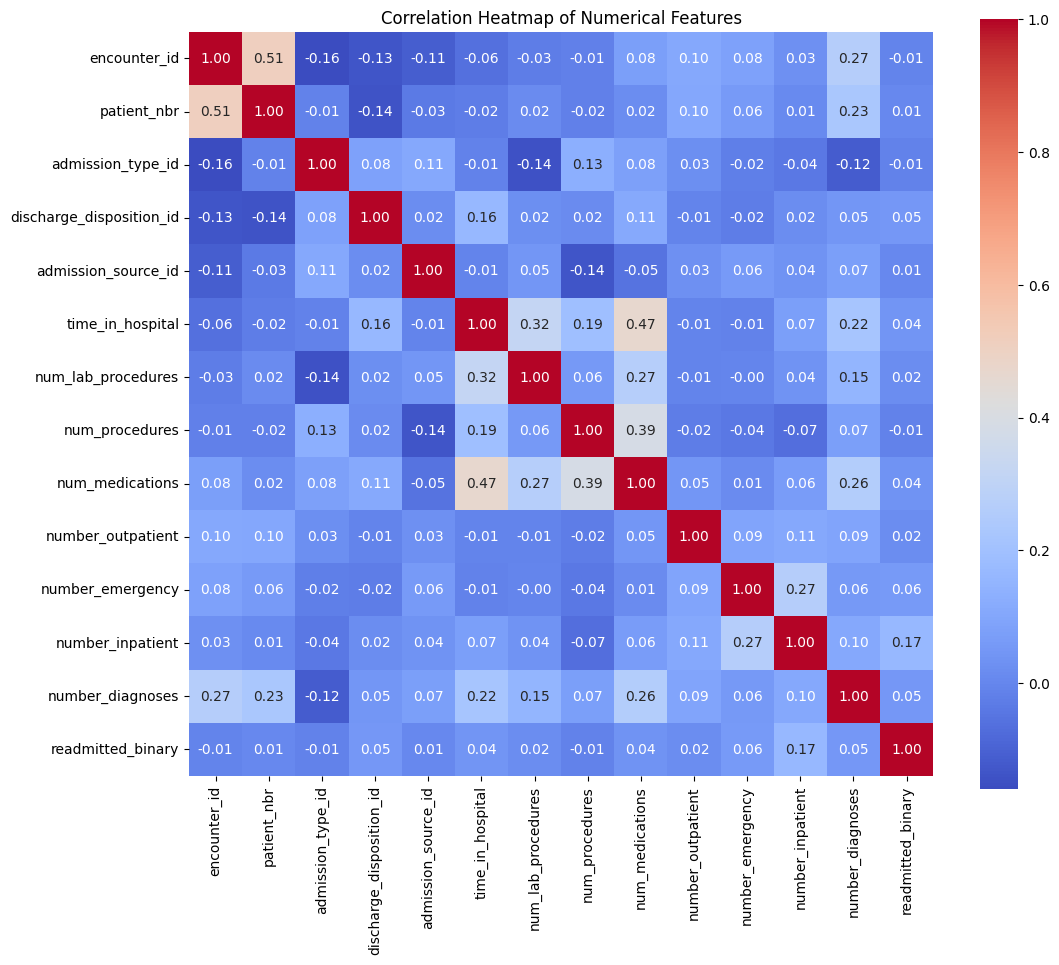

In [25]:
# Correlation heatmap for numerical features
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Summary & Next Steps

- The dataset contains both numeric and categorical features, with some missing values and special missing indicators ('?').
- Key variables such as age, gender, and emergency visits show meaningful relationships with readmission.
- The target variable has been binarized for modeling.
- Outliers and correlations among numeric features have been visualized.

**Next steps:**
- Handle missing values (drop or impute as appropriate).
- Encode categorical variables for modeling.
- Save the cleaned dataset for use in preprocessing and modeling notebooks.